# Наивный Байес

Наи́вный ба́йесовский классифика́тор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно. Во многих практических приложениях для оценки параметров для наивных байесовых моделей используют метод максимального правдоподобия; другими словами, можно работать с наивной байесовской моделью, не веря в байесовскую вероятность и не используя байесовские методы.

Несмотря на наивный вид и, несомненно, очень упрощенные условия, наивные байесовские классификаторы часто работают намного лучше нейронных сетей во многих сложных жизненных ситуациях.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

# Лабораторная работа

In [47]:
# Используемые библиотеки

import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [48]:
# Загружаем датасет

cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
# Выбираем признаки, обозначающие средние значения

columns_to_drop = list(cancer_df.columns[11:30])
cancer_df.drop(columns=columns_to_drop, inplace=True)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260


In [50]:
# Создаем график распределения для каждого признака

def show_features_distr():

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    for i, feature in enumerate(cancer_df.columns):
        plt.subplot(3, 4, i + 1)
        sns.histplot(cancer_df[feature], kde=True, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel('')
    
    plt.tight_layout()
    plt.show()

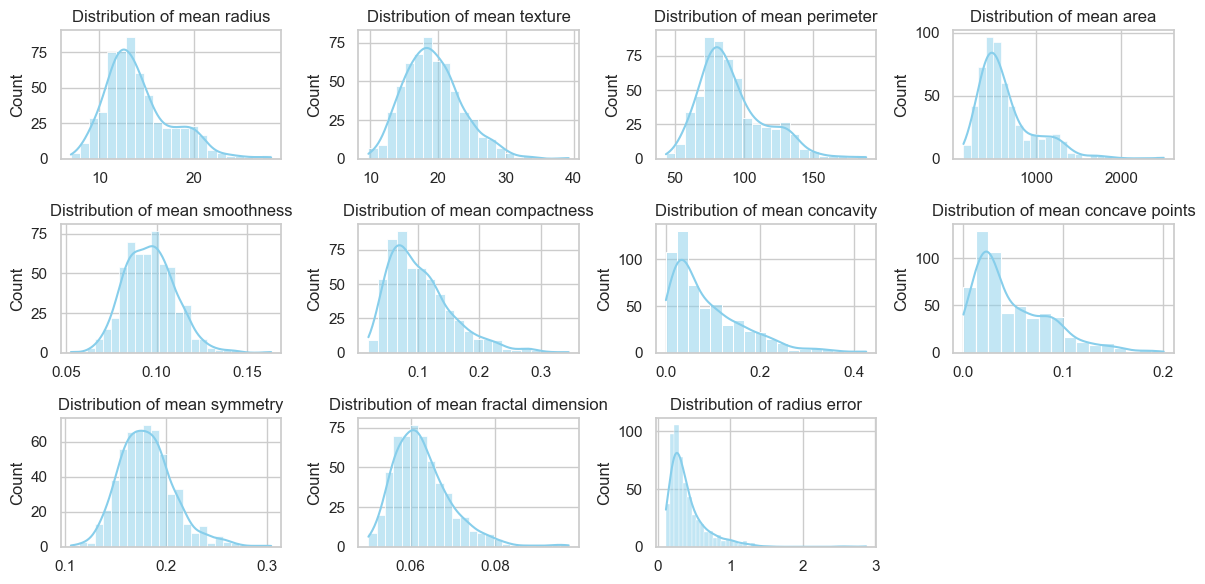

In [51]:
show_features_distr()

In [52]:
# Строим тепловую карту

def show_heatmap():
    correlation_matrix = cancer_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Тепловая карта матрицы корреляций признаков')
    plt.show()

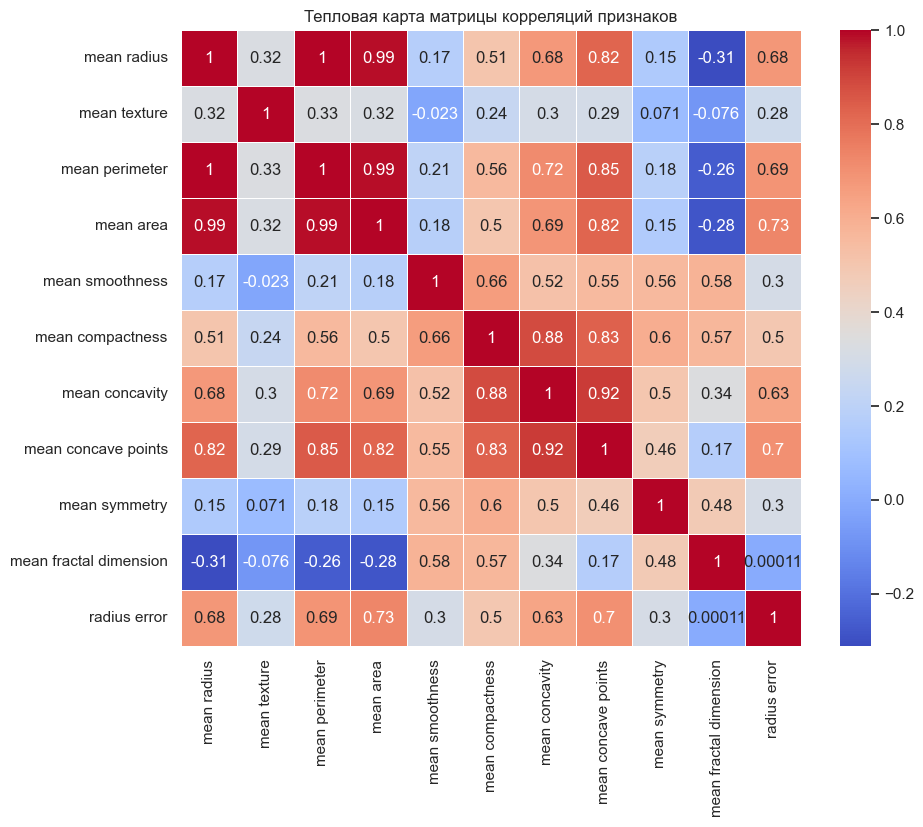

In [53]:
show_heatmap()

In [54]:
# Отбор признаков
# Порог корреляции = 0.65

columns_to_drop = [
    'mean concave points', 
    'mean concavity', 
    'mean compactness', 
    'mean perimeter',
    'mean area'
]

cancer_df.drop(columns=columns_to_drop, inplace=True)
cancer_df

,mean radius,mean texture,mean smoothness,mean symmetry,mean fractal dimension,radius error
0,17.99,10.38,0.11840,0.2419,0.07871,1.0950
1,20.57,17.77,0.08474,0.1812,0.05667,0.5435
2,19.69,21.25,0.10960,0.2069,0.05999,0.7456
3,11.42,20.38,0.14250,0.2597,0.09744,0.4956
4,20.29,14.34,0.10030,0.1809,0.05883,0.7572
...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.1726,0.05623,1.1760
565,20.13,28.25,0.09780,0.1752,0.05533,0.7655
566,16.60,28.08,0.08455,0.1590,0.05648,0.4564
567,20.60,29.33,0.11780,0.2397,0.07016,0.7260


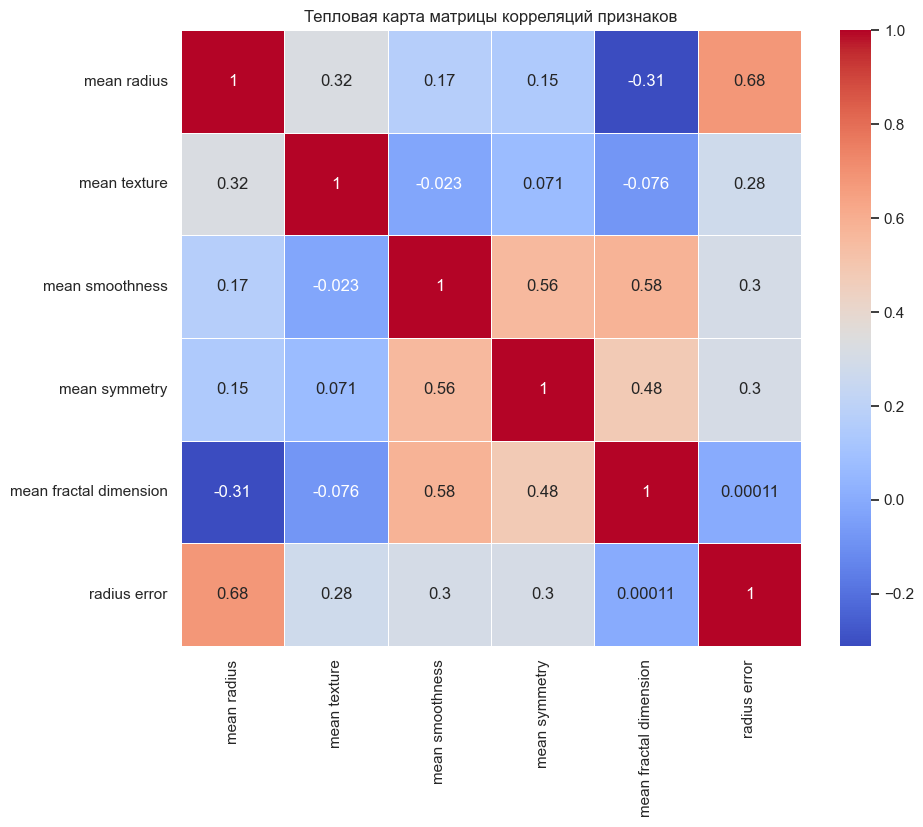

In [55]:
show_heatmap()

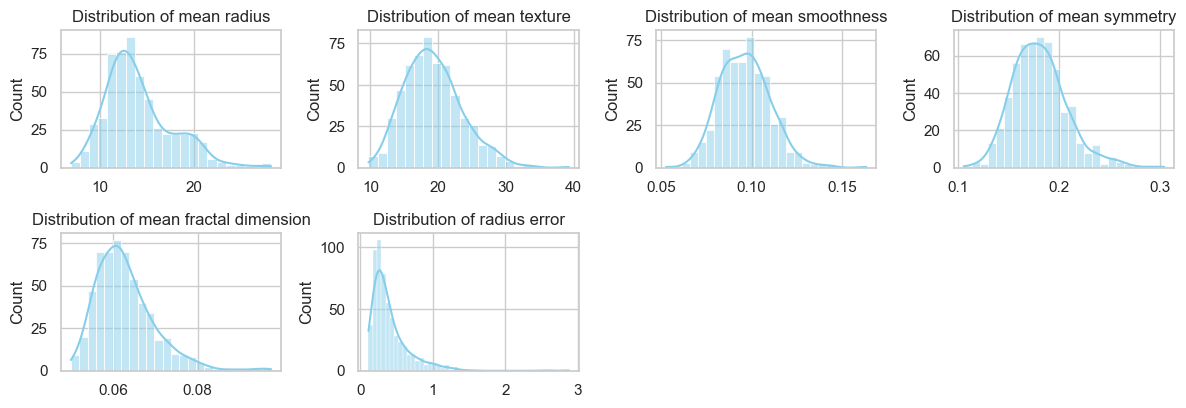

In [56]:
show_features_distr()

In [57]:
# Получение выборок

X = cancer_df
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# Обучение модели

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.8596491228070176

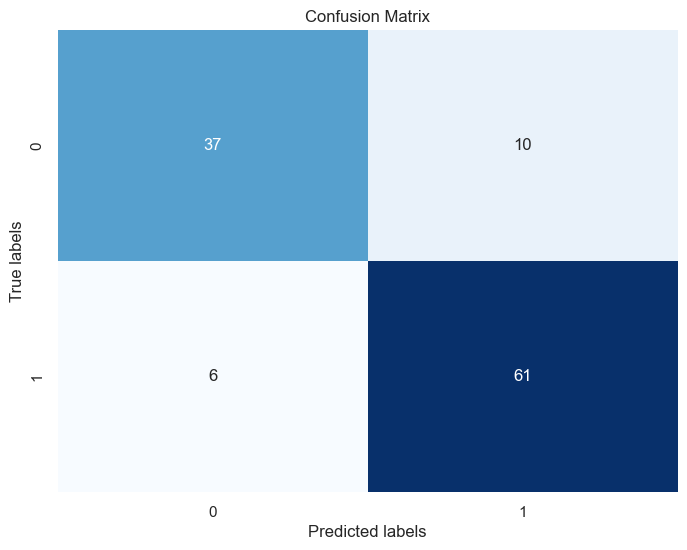

In [59]:
# Строим матрицу ошибок

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()